<a href="https://colab.research.google.com/github/GuillaumeArp/Wild_Notebooks/blob/main/Monty_Hall_Guillaume_Arp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Monty Hall

**Below is an example of an implementation of the Monty Hall game using native Python. It contains no comments.**

## Mission 1

After reviewing the code below, add both **unilinear** and **multilinear** comments to explain how it works to another developer.

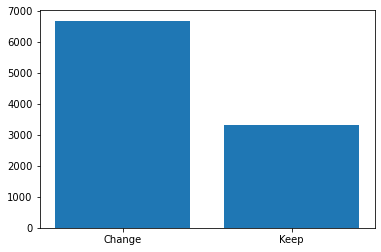

In [1]:
import matplotlib.pyplot as plt
from random import choice

def play_one_game(strategy):

  # Setting up the 3 options in a list, and deciding randomly which one is ok.
  doors = ['A', 'B', 'C']
  correct_door = choice(doors)
  
  # Choosing randomly one door, and removing it from the list so that
  # it won't get selected by random.choice afterwards.
  first_choice = choice(doors)
  doors.remove(first_choice)

  # The hint door is always a door not chosen, and always an empty one, a while
  # loop is used to pick one that is empty from the redacted list of 2 options.
  while True:
    hint_door = choice(doors)
    if hint_door != correct_door:
      doors.remove(hint_door)
      break

  # The strategy defined as the function argument is handled here. The argument
  # can only be either "change" or "keep", any other string will raise an error.
  # If changing door, a random choice is run between the 2 remaining doors.
  if strategy.lower() == "change":
      second_choice = choice(doors)
  elif strategy.lower() == "keep":
      second_choice = first_choice
  else:
      raise ValueError("Strategy not recognized!")
  
  # Will return True if the second choice matches the correct door.
  return second_choice == correct_door


# This function accepts a strategy ("choice" or "keep" only) and a number of
# turns, and runs the previous function the number of times passed as argument.
# Each True addes 1 to a list, and False returns 0, so it can be plotted.
def play_many_games(strategy, nb_turns):
    return list(1 if play_one_game(strategy) else 0 for i in range(nb_turns))

# Plots the lists returned from the function as bar plot counting 1s and 0s.
plot = plt.bar([1, 2],
               [sum(play_many_games("change", 10000)), sum(play_many_games("keep", 10000))], 
               tick_label=["Change", "Keep"])

# Mission 2

To make sure you understood the code, in a new cell, change up the code in mission 1 to add a third bar, corresponding to a new strategy called **Alternate**. 

A player following it will alternate **randomly** between "Change" and "Keep".


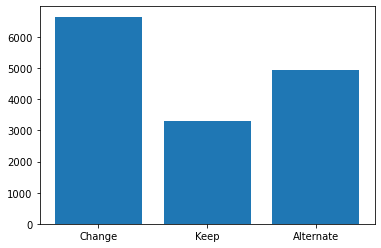

In [2]:
def play_one_game(strategy):

  # Setting up the 3 options in a list, and deciding randomly which one is ok.
  doors = ['A', 'B', 'C']  
  correct_door = choice(doors)
  
  # Choosing randomly one door, and removing it from the list so that
  # it won't get selected by random.choice afterwards.
  first_choice = choice(doors)
  doors.remove(first_choice)

  # The hint door is always a door not chosen, and always an empty one, a while
  # loop is used to pick one that is empty from the redacted list of 2 options.
  while True:
    hint_door = choice(doors)
    if hint_door != correct_door:
      doors.remove(hint_door)
      break

  # The strategy defined as the function argument is handled here. The argument
  # can only be either "change" or "keep", any other string will raise an error.
  # If changing door, a random choice is run between the 2 remaining doors.

  # Adding an options list that can be randomly chosen from with alternate
  # strategy.
  options = [choice(doors), first_choice]
  
  if strategy.lower() == "change":
      second_choice = choice(doors)
  elif strategy.lower() == "keep":
      second_choice = first_choice
  elif strategy.lower() == "alternate":
      second_choice = choice(options)
  else:
      raise ValueError("Strategy not recognized!")
  
  # Will return True if the second choice matches the correct door.
  return second_choice == correct_door


# This function accepts a strategy ("choice" or "keep" only) and a number of
# turns, and runs the previous function the number of times passed as argument.
# Each True addes 1 to a list, and False returns 0, so it can be plotted.
def play_many_games(strategy, nb_turns):
    return list(1 if play_one_game(strategy) else 0 for i in range(nb_turns))

# Plots the lists returned from the function as bar plot counting 1s and 0s.
plot = plt.bar([1, 2, 3],
               [sum(play_many_games("change", 10000)), sum(play_many_games("keep", 10000)), sum(play_many_games("alternate", 10000))], 
               tick_label=["Change", "Keep", "Alternate"])

# Mission 3

Now, re-code the Monty Hall game using NumPy. **Do not use Python lists, the built-in `random` module, or any for or while loops in the code**. NumPy contains all the mechanisms you need to achieve the same result.

Finally, combine the 2 functions, `play_one_game` and `play_many_games`. In other words, **your NumPy program should now contain only one function**. Obviously, **the visual should be the same as in mission 2**.

In [3]:
import numpy as np
import matplotlib.pyplot as plt


def monty_hall_numpy(nb_turns):

    # Creating random arrays containing 0, 1 or 2 representing the 3 doors.
    # The size is the function argument.
    correct_doors = np.random.randint(0, 3, size=nb_turns)
    first_choices = np.random.randint(0, 3, size=nb_turns)

    # Creating a mask of the same length, with random values being 0 or 1,
    # representing the alternate strategy, 1 being change door.
    mask = np.random.randint(0, 2, first_choices.shape)
    # Applying a np.where filter that, if True, adds a 1 if the first choice
    # was not the correct door, and if False, adds one if the first choice was
    # correct. The array is summed to count the wins.
    alternate_wins = np.sum(np.where(mask == 1, first_choices != correct_doors, first_choices == correct_doors))

    # Counts a win for the keep if the first choice was correct, and a win for
    # the change if the first choice was incorrect, keeping in mind that in case
    # of a change, the only other possibility is the correct door.
    change_wins = (correct_doors != first_choices)
    keep_wins = (correct_doors == first_choices)

    # Plotting the results in a bar plot.
    plot = plt.bar([1, 2, 3],
                   [change_wins.sum(), keep_wins.sum(), alternate_wins],
                   tick_label=["Change", "Keep", "Alternate"])

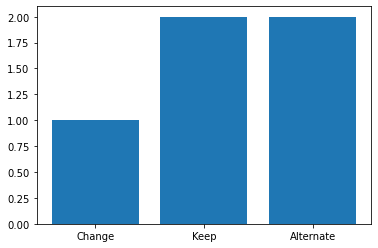

In [12]:
monty_hall_numpy(3)